Downloading S&P500 Price Data  

In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-26 00:00:00-04:00,4344.839844,4362.060059,4328.080078,4328.819824,3415030000,0.0,0.0
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,0.0,0.0
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-06-16 00:00:00-04:00', '2023-06-20 00:00:00-04:00',
               '2023-06-21 00:00:00-04:00', '2023-06-22 00:00:00-04:00',
               '2023-06-23 00:00:00-04:00', '2023-06-26 00:00:00-04:00',
               '2023-06-27 00:00:00-04:00', '2023-06-28 00:00:00-04:00',
               '2023-06-29 00:00:00-04:00', '2023-06-30 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23989, freq=None)

Cleaning and Visualizing our stock market data

<Axes: xlabel='Date'>

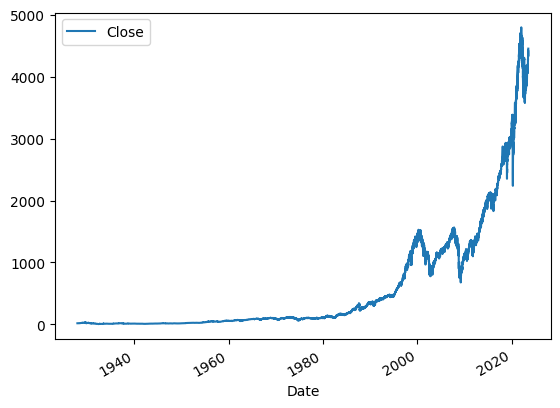

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

Setting up our Target for Machine Learning

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-06-26 00:00:00-04:00,4344.839844,4362.060059,4328.080078,4328.819824,3415030000,4378.410156
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,4376.859863
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941


In [10]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-06-26 00:00:00-04:00,4344.839844,4362.060059,4328.080078,4328.819824,3415030000,4378.410156,1
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,4376.859863,0
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941,1


In [12]:
sp500= sp500.loc["2000-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1
...,...,...,...,...,...,...,...
2023-06-26 00:00:00-04:00,4344.839844,4362.060059,4328.080078,4328.819824,3415030000,4378.410156,1
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,4376.859863,0
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941,1


Training an initial machine learning model

In [14]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train= sp500.iloc[:-100]
test= sp500.iloc[-100:]

predictors=["Close","Volume","Open","High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [16]:
import pandas as pd

preds=pd.Series(preds, index=test.index)

In [18]:
precision_score(test["Target"], preds)

0.5454545454545454

In [19]:
combined= pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

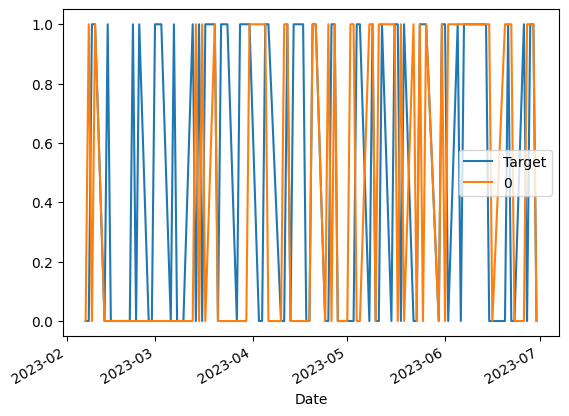

In [20]:
combined.plot()

Building a backtesting system

In [21]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds , index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [22]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions=[]

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [23]:
predictions = backtest(sp500, model, predictors)

In [24]:
predictions["Predictions"].value_counts()

1    1762
0    1649
Name: Predictions, dtype: int64

In [26]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5227014755959137

In [27]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.542949
0    0.457051
Name: Target, dtype: float64

Adding additional predictors to our models

In [29]:
horizons=[2,5,60,250,1000]
new_predictors=[]

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [31]:
sp500 = sp500.dropna()

In [32]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1094.040039,1098.469971,1094.040039,1095.890015,356070000,1109.479980,1,1.000845,1.0,1.002176,3.0,1.039354,34.0,1.137825,135.0,0.957328,485.0
2003-12-29 00:00:00-05:00,1095.890015,1109.479980,1095.890015,1109.479980,1058800000,1109.640015,1,1.006162,2.0,1.010755,4.0,1.050761,34.0,1.150837,135.0,0.969445,486.0
2003-12-30 00:00:00-05:00,1109.479980,1109.750000,1106.410034,1109.640015,1012600000,1111.920044,1,1.000072,2.0,1.007835,4.0,1.049591,34.0,1.150046,135.0,0.969833,486.0
2003-12-31 00:00:00-05:00,1109.640015,1112.560059,1106.209961,1111.920044,1027500000,1108.479980,0,1.001026,2.0,1.006997,4.0,1.050463,34.0,1.151439,136.0,0.972073,486.0
2004-01-02 00:00:00-05:00,1111.920044,1118.849976,1105.079956,1108.479980,1153200000,1122.219971,1,0.998451,1.0,1.001263,4.0,1.046073,33.0,1.147024,135.0,0.969348,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23 00:00:00-04:00,4354.169922,4366.549805,4341.339844,4348.330078,6053620000,4328.819824,0,0.996156,1.0,0.993032,1.0,1.039302,33.0,1.087526,117.0,1.149059,533.0
2023-06-26 00:00:00-04:00,4344.839844,4362.060059,4328.080078,4328.819824,3415030000,4378.410156,1,0.997752,0.0,0.992237,1.0,1.033400,32.0,1.082182,117.0,1.143499,533.0
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,4376.859863,0,1.005695,1.0,1.004078,2.0,1.043878,32.0,1.093970,118.0,1.156171,534.0


Improving our Model

In [33]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [34]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds , index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [35]:
predictions = backtest(sp500, model, new_predictors)

In [36]:
predictions["Predictions"].value_counts()

0.0    1994
1.0     416
Name: Predictions, dtype: int64

In [37]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5360576923076923